In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import pandas as pd
df = pd.read_csv("/kaggle/input/genomics-of-drug-sensitivity-in-cancer-gdsc/GDSC_DATASET.csv")

In [42]:
df.head()
#pandas dataframe inin ilk 5 satırını görüntüler

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


In [43]:
df.info() 
#veri kümesinin yapısını tanımlamak için kullanıyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                240968 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 232669 non-null  object 
 9   GDSC Tissue descriptor 2                 232669 non-null  object 
 10  Cancer Type (matching TCGA label

In [44]:
df.describe()

,COSMIC_ID,DRUG_ID,LN_IC50,AUC,Z_SCORE
count,2.420350e+05,242035.000000,242035.000000,242035.000000,242035.000000
mean,9.921071e+05,1594.044886,2.817111,0.882593,0.000006
std,2.209814e+05,398.739728,2.762191,0.146998,0.999390
min,6.836670e+05,1003.000000,-8.747724,0.006282,-8.254501
25%,9.068050e+05,1149.000000,1.508054,0.849452,-0.656842
50%,9.097200e+05,1631.000000,3.236744,0.944197,0.010585
75%,1.240144e+06,1912.000000,4.700111,0.974934,0.656036
max,1.789883e+06,2499.000000,13.820189,0.998904,7.978776


In [45]:
df.isnull().sum()
#kaç eksik veri olduğunu gösterir

COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME                                      0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9366
GDSC Tissue descriptor 2                    9366
Cancer Type (matching TCGA label)          51446
Microsatellite instability Status (MSI)    12353
Screen Medium                               9366
Growth Properties                           9366
CNA                                         9366
Gene Expression                             9366
Methylation                                 9366
TARGET                                     27155
TARGET_PATHWAY                                 0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


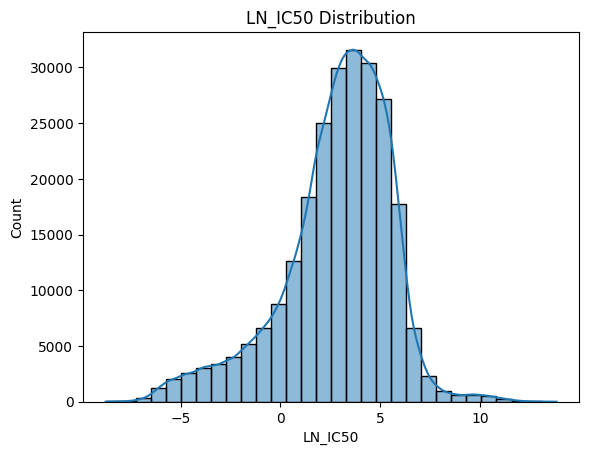

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['LN_IC50'], kde=True, bins=30)
plt.title("LN_IC50 Distribution")
plt.show()
#veri kümesindeki LN_IC50(İLAÇ DUYARLILIĞI) değerlerinin nasıl dağıldığını gösterir.

In [47]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
#sayısal sütunlar arası korelasyon matrisini hesaplar

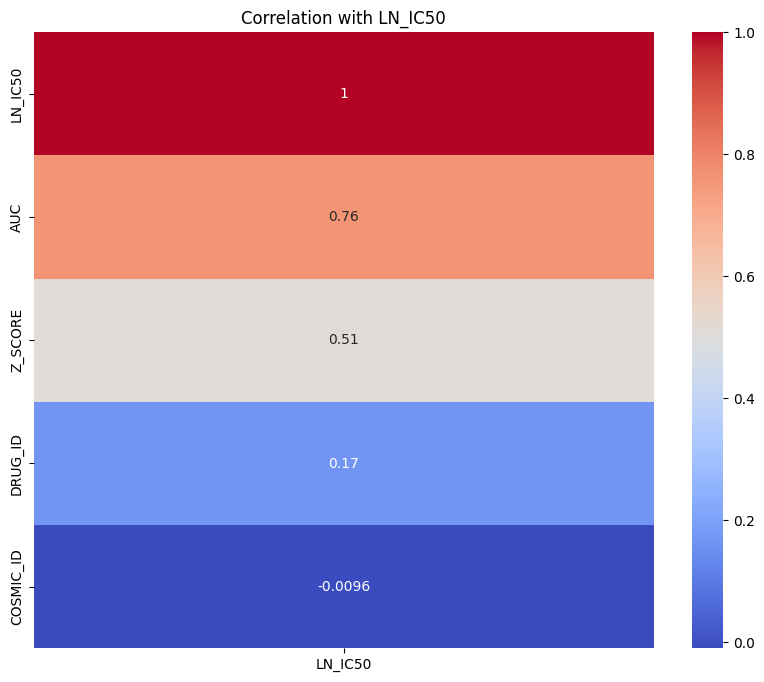

In [48]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['LN_IC50']].sort_values(by='LN_IC50', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with LN_IC50")
plt.show
#korelasyon matrislerini hesapladık ve görselleştirdik

In [49]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
corr_target = corr['LN_IC50'].abs()
selected_features = corr_target[corr_target > 0.3].index.tolist()
selected_features.remove('LN_IC50')  # Hedef değişkeni çıkar

In [50]:
df_selected = df[selected_features + ['LN_IC50']]

In [51]:
df_selected = df_selected.dropna()  # eksik verileri çıkar
# veya
# df_selected = df_selected.fillna(df_selected.mean())  # ortalama ile doldur

In [52]:
from sklearn.model_selection import train_test_split

X = df_selected.drop('LN_IC50', axis=1)
y = df_selected['LN_IC50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi eğitim ve test setlerine %80 - %20 oranında bölüyoruz, 
# böylece modelimizi eğitim verisiyle eğitip test verisiyle doğrulayabiliriz.

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Random Forest regresyon modelini oluşturup eğitim verisiyle eğitiyoruz.

RandomForestRegressor(random_state=42)

In [54]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Test verisi üzerinde tahmin yapıp modelin performansını MSE ve R² skorlarıyla değerlendiriyoruz.

MSE: 2.8487
R2 Score: 0.6266


In [55]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 ağaç ile
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# 100 ağaçtan oluşan Random Forest modeli oluşturulup eğitim verisiyle eğitiyoruz
# Ardından test verisi üzerinde tahmin yapıyoruz ve modelin başarısı MSE ve R² skorları ile değerlendiriyoruz

MSE: 2.848713916584017
R2: 0.6266016364392606


In [56]:
from sklearn.model_selection import cross_val_score
import numpy as np

model = RandomForestRegressor(n_estimators=10, random_state=42)

scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5 parçaya böl, R² skoruna bak
print("5-Fold CV R2 scores:", scores)
print("Ortalama R2:", np.mean(scores))

# Random Forest modelini 5 katlı çapraz doğrulama ile değerlendiriyoruz.
# Her katmanın R² skorunu hesaplayıp, modelin genel performansını ortalama skorla özetliyoruz.

5-Fold CV R2 scores: [0.57632602 0.53361927 0.50400333 0.57314931 0.52644705]
Ortalama R2: 0.542708996481469


In [57]:
X = pd.get_dummies(X, drop_first=True)

In [58]:
print(X.dtypes.value_counts())


float64    2
Name: count, dtype: int64


yukarıdakı encoing yapıp yapmadığımızı karar verdik gerek yok çünkü sayısal

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# Özellikleri standartlaştırıyoruz (ortalama 0, standart sapma 1 olacak şekilde).
# Standartlaştırılmış verilerle Random Forest modelini eğitip test setinde performansını MSE ve R² ile değerlendiriyoruz.

MSE: 2.8479209463392285
R2: 0.6267055759012166


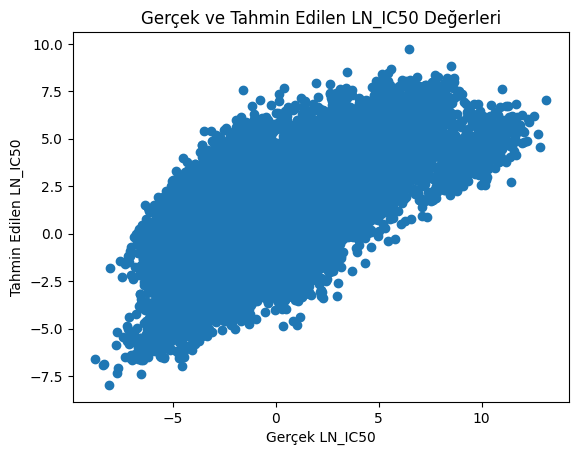

In [60]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek LN_IC50")
plt.ylabel("Tahmin Edilen LN_IC50")
plt.title("Gerçek ve Tahmin Edilen LN_IC50 Değerleri")
plt.show()

# Gerçek ve tahmin edilen LN_IC50 değerlerini scatter plot ile karşılaştırarak modelin tahmin doğruluğunu görselleştiriyoruz.

her model için ortalama R2 skorunu hesapl

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
   
]

for name, model in models:
    score = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(f"{name} - Mean R2 Score: {score:.4f}")

# Farklı regresyon modellerini 5 katlı çapraz doğrulama ile karşılaştırıyoruz.
# Her modelin ortalama R² skorunu hesaplayarak performanslarını değerlendiriyoruz.

Linear Regression - Mean R2 Score: 0.5973
Random Forest - Mean R2 Score: 0.5724
Decision Tree - Mean R2 Score: 0.2496


En iyi model: Linear Regression Çünkü en yüksek ortalama R2 skorunu verdi (0.5973), yani verideki varyansın yaklaşık %59'unu açıklayabiliyor. Diğer modeller bunun gerisinde kalmış

Mean Squared Error (MSE): 2.9003783846974747
Mean Absolute Error (MAE): 1.1456591811911585
R² Score: 0.6198296584826484


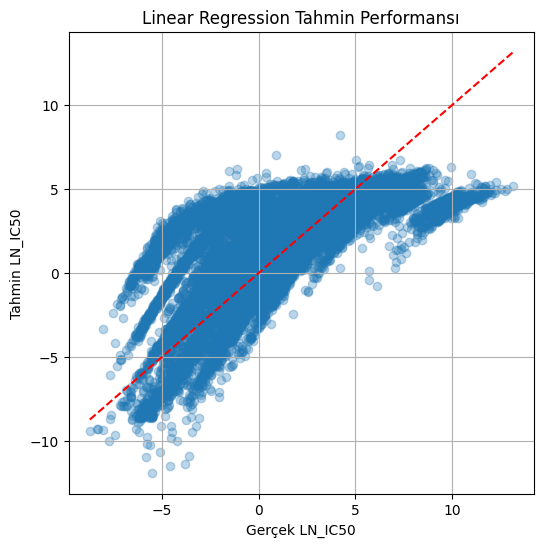

In [62]:
# Gerekli kütüphaneler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Modeli oluştur ve eğit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = lr_model.predict(X_test)

# Değerlendirme metriklerini yazdır
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Tahmin grafiği
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gerçek LN_IC50")
plt.ylabel("Tahmin LN_IC50")
plt.title("Linear Regression Tahmin Performansı")
plt.grid(True)
plt.show()

# Lineer regresyon modelini oluşturup eğitim verisiyle eğitiyoruz.
# Test verisi üzerinde tahmin yaparak model performansını MSE, MAE ve R² skorları ile değerlendiriyoruz.
# Son olarak, gerçek ve tahmin edilen değerleri karşılaştıran bir scatter plot ile tahmin doğruluğunu görselleştiriyoruz.

Model çok yüksek doğrulukla (%98) sınıflandırma yapıyor. Hem sınıf 0 (Dirençli) hem sınıf 1 (Duyarlı) için başarı oranı oldukça yüksek.

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Hedef değişken
y = df["LN_IC50"]

# Girdiler
X = df[[
    "AUC", "Z_SCORE", "TCGA_DESC", "GDSC Tissue descriptor 1",
    "Cancer Type (matching TCGA label)", "Microsatellite instability Status (MSI)",
    "Screen Medium", "Growth Properties", "TARGET", "TARGET_PATHWAY"
]]

# Kategorik değişkenleri sayısallaştır
X = pd.get_dummies(X, drop_first=True)

# Eksik değerleri doldur
X = X.fillna(X.mean())

# Eğitim-test bölme
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Modeli oluştur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin ve başarı
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

# Veri hazırlama aşaması: hedef değişken ve özellikler seçiliyor,
# kategorik değişkenler one-hot encoding ile sayısallaştırılıyor ve eksik değerler dolduruluyor.
# Veri eğitim ve test setlerine ayrıldıktan sonra Lineer Regresyon modeli eğitilip test seti üzerinde başarı ölçülüyor.

R2 Score: 0.920364609376386


Harika, R² = 0.92 gibi yüksek bir değer elde edildi. Bu, modelinin test verisinde hedef değişken olan LN_IC50’yi %92 oranında açıklayabildiğini gösterir.

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge model ve parametre aralığı
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch ile en iyi alpha değerini bul
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

# En iyi model
best_ridge = grid.best_estimator_

# Test verisi üzerinde performans
y_pred_ridge = best_ridge.predict(X_test)
print("En iyi alpha:", grid.best_params_['alpha'])
print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge))

# Ridge regresyon modeli için farklı alpha değerlerini GridSearchCV ile çapraz doğrulama kullanarak arıyoruz.
# En iyi alpha parametresi ile modeli eğitip, test setinde R² skorunu hesaplıyoruz.

En iyi alpha: 0.1
Ridge R2 Score: 0.9203645105082412


Modelin R² skoru %92 ile oldukça yüksek; yani model, LN_IC50 değerini tahmin etmede oldukça başarılı.

Ridge regresyon (alpha = 0.1) elde edildi; bu da modelin aşırı öğrenme yapmadığını ve veriyle uyumlu çalıştığını gösteriyor. Ridge, modeli daha stabil hâle getirdi ama performansı çok değiştirmedi.

Sonuç: Model sağlam, genelleme yeteneği yüksek ve LN_IC50 tahmininde güvenilir.

CLASSIFICATION:

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Eşik değeri belirleyelim (örneğin medyan)
threshold = df['LN_IC50'].median()

# Yeni sınıf etiketi (1 = duyarlı, 0 = dirençli)
df['Label'] = (df['LN_IC50'] < threshold).astype(int)

In [64]:
X = df.drop(['LN_IC50', 'Label'], axis=1)  # Özellikler
y = df['Label']  # Hedef sınıf

# Eğitim ve test verisi bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X = df.drop(['LN_IC50', 'Label'], axis=1)
X = X.select_dtypes(include=['int64', 'float64'])  # Sadece sayısal sütunlar

y = df['Label']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Veriyi %80 eğitim ve %20 test olarak bölüyoruz.
# Random Forest sınıflandırma modelini oluşturup eğitim verisiyle eğitiyoruz.
# Test verisi üzerinde tahminler yapıyoruz.

In [67]:
df.head()
df.dtypes

COSMIC_ID                                    int64
CELL_LINE_NAME                              object
TCGA_DESC                                   object
DRUG_ID                                      int64
DRUG_NAME                                   object
LN_IC50                                    float64
AUC                                        float64
Z_SCORE                                    float64
GDSC Tissue descriptor 1                    object
GDSC Tissue descriptor 2                    object
Cancer Type (matching TCGA label)           object
Microsatellite instability Status (MSI)     object
Screen Medium                               object
Growth Properties                           object
CNA                                         object
Gene Expression                             object
Methylation                                 object
TARGET                                      object
TARGET_PATHWAY                              object
Label                          

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
#ONE HOT ENCODING
# Hedef değişken
y = df['Label']

# 'LN_IC50' dahil edilmemeli, çünkü bu regresyon hedefi
X = df.drop(['LN_IC50', 'Label'], axis=1)

# Sadece kategorik sütunları seçip one-hot encoding uygula
X = pd.get_dummies(X)

# Eğitim-test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluştur ve eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Veriyi %80 eğitim ve %20 test olarak bölüyoruz.
# Random Forest sınıflandırma modelini oluşturup eğitim verisiyle eğitiyoruz.
# Test verisi üzerinde tahminler yapıyoruz.

Confusion Matrix:
[[23702   535]
 [  526 23644]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     24237
           1       0.98      0.98      0.98     24170

    accuracy                           0.98     48407
   macro avg       0.98      0.98      0.98     48407
weighted avg       0.98      0.98      0.98     48407



1. Confusion Matrix:
Model hem 0'ları hem de 1'leri oldukça başarılı şekilde tahmin ediyor.

2. Classification Report:
Accuracy: %98
Precision: Modele göre tahmin edilen pozitiflerin %98’i gerçekten doğru.
Recall: Gerçek pozitiflerin %98’ini doğru tahmin etmiş.
F1-Score: Precision ve Recall dengesi çok iyi.

Modelin performansı çok yüksek (%98 doğruluk), bu sınıflandırma görevini başarıyla yerine getirdiğinizi gösteriyor.
Veri dengeli, çünkü 0 ve 1 sınıflarının örnek sayıları yakın.


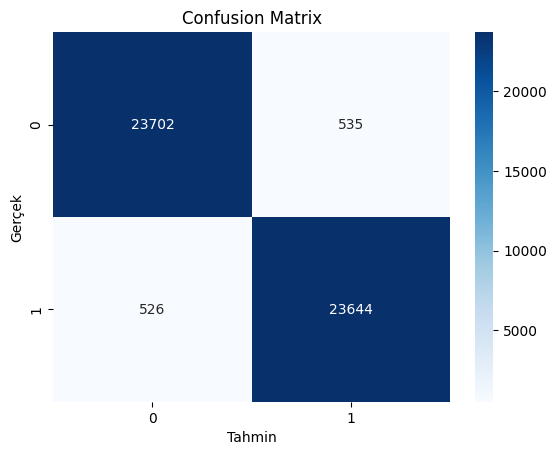

              precision    recall  f1-score   support

    Dirençli       0.98      0.98      0.98     24237
     Duyarlı       0.98      0.98      0.98     24170

    accuracy                           0.98     48407
   macro avg       0.98      0.98      0.98     48407
weighted avg       0.98      0.98      0.98     48407



In [69]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)

# Isı haritası
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()

# Sınıflandırma raporu
print(classification_report(y_test, y_pred, target_names=["Dirençli", "Duyarlı"]))

# Test sonuçlarını değerlendirmek için karışıklık matrisi oluşturulup görselleştiriliyor.
# Ayrıca, sınıflandırma raporu ile detaylı performans metrikleri (precision, recall, f1-score) yazdırılıyor.

In [75]:
!git clone https://github.com/elifnuryaygin03/ml-cancer-prediction.git

Cloning into 'ml-cancer-prediction'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.
